Chargement du fichier

In [ ]:
import pandas as pd

# Charger le fichier avec le bon séparateur
df = pd.read_csv("2023-2024 NBA Player Stats - Playoffs.csv", sep=";")

# Afficher les premières lignes
df.head()


,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,PF,24,NYK,9,2,20.4,2.3,4.8,...,0.385,2.4,1.8,4.2,0.6,0.4,1.3,0.4,2.2,5.2
1,2,Bam Adebayo,C,26,MIA,5,5,38.4,9.6,19.4,...,0.714,2.2,7.2,9.4,3.8,0.4,0.0,1.6,3.0,22.6
2,3,Nickeil Alexander-Walker,SG,25,MIN,16,1,23.6,2.6,7.0,...,1.000,0.3,1.4,1.8,2.3,0.6,0.4,0.9,1.5,7.3
3,4,Grayson Allen,SG,28,PHO,2,2,21.5,0.5,2.5,...,1.000,1.0,3.0,4.0,1.0,0.5,0.0,1.5,2.0,3.5
4,5,Jarrett Allen,C,25,CLE,4,4,31.8,6.3,9.3,...,0.692,3.8,10.0,13.8,1.3,1.3,1.0,1.3,2.0,17.0


Sélection des colonnes utiles

In [ ]:
# Garder uniquement les colonnes pertinentes
df = df[['Player', 'G', 'MP', 'FG', 'FGA', 'FG%', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PTS']]
df = df.rename(columns={'MP': 'MIN', 'FG%': 'FG_PCT'})  # Renommage pour cohérence

# Supprimer les joueurs ayant joué peu de matchs
df = df[df['G'] > 5]

# Supprimer les lignes avec valeurs manquantes
df = df.dropna()


Préparation des variables pour la régression

In [ ]:
# Définir les variables indépendantes et la variable cible
features = ['MIN', 'FG', 'FGA', 'FG_PCT', 'TRB', 'AST', 'STL', 'BLK', 'TOV']
target = 'PTS'

X = df[features]
y = df[target]


Séparer les données en entraînement et test

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Entraîner le modèle de régression linéaire

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

# Prédiction
y_pred = model.predict(X_test)


Évaluer le modèle

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print(f"R² : {r2:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"MAE : {mae:.2f}")


R² : 0.97
RMSE : 1.09
MAE : 0.84


Visualisation des prédictions

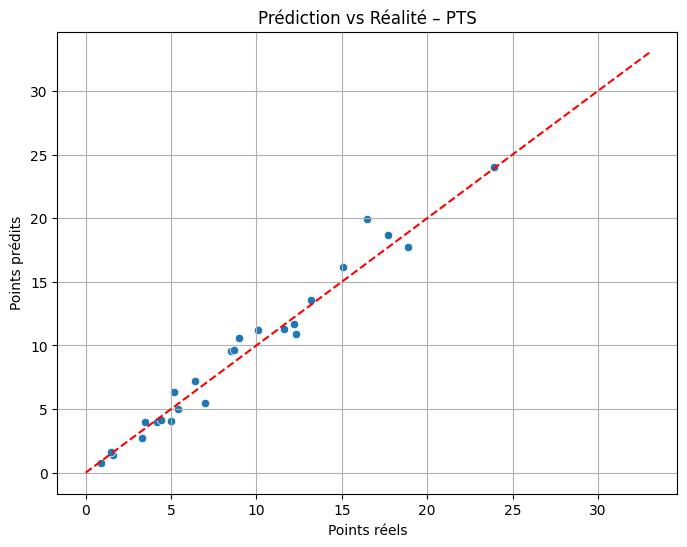

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Points réels")
plt.ylabel("Points prédits")
plt.title("Prédiction vs Réalité – PTS")
plt.grid(True)
plt.show()


Interprétation & prédictions pour joueurs clés

In [ ]:
# Tableau des prédictions pour quelques joueurs
joueurs_clefs = df[['Player'] + features].copy()
joueurs_clefs['Predicted_PTS'] = model.predict(df[features])

# Trier les meilleurs scores prédits
joueurs_clefs[['Player', 'Predicted_PTS']].sort_values(by='Predicted_PTS', ascending=False).head(10)


,Player,Predicted_PTS
27,Jalen Brunson,32.247826
119,Tyrese Maxey,29.507987
56,Shai Gilgeous-Alexander,29.478923
97,Nikola Joki?,29.012603
42,Luka Don?i?,28.856445
46,Joel Embiid,28.693321
133,Donovan Mitchell,28.661229
10,Paolo Banchero,27.799595
45,Anthony Edwards,26.523361
128,Khris Middleton,25.128682
